In [587]:
import sklearn.datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [588]:
#any network our custom layer etc must inherit from nn.Module
class FeedForward(nn.Module):
    def __init__(self, num_of_attributes, num_of_hidden_layers ,num_of_hidden_units, num_of_classes):
        super().__init__() # constructor of parent class

        self.layers = nn.ModuleList() #This is important to use this instead of simple list!

        previous_layer_attributes_num = num_of_attributes

        for i in range(num_of_hidden_layers):
            self.layers.append(nn.Sequential(
                            nn.Linear(previous_layer_attributes_num, num_of_hidden_units[i]),
                            nn.ReLU()
                                    ))
            previous_layer_attributes_num = num_of_hidden_units[i]
        
        self.layers.append(nn.Linear(previous_layer_attributes_num, num_of_classes))


    #this method is necessary and helps in forward pass
    def forward(self, x):
        for layer in self.layers:
            x = x.flatten(1)
            x = layer(x)

        return x
        
        

In [589]:
class easyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return torch.tensor(self.X[index], dtype=torch.float32), torch.tensor(self.y[index], dtype=torch.float32)

In [590]:
def train(model, optimizer, loss_func, loader, epochs, device, verbose, multiclass=False):
    for epoch in range(epochs):
        losses = []
        for X, y in loader:
            X, y = X.to(device), y.to(device)

            
            optimizer.zero_grad()
            logits = model(X)
            
            if not multiclass:
                logits = logits.flatten()
            
            loss = loss_func(logits, y)
            losses.append(loss.item())

            loss.backward()
            optimizer.step()
        if verbose or epoch == epochs-1:
            print(f"epoch {epoch}, loss: {sum(losses)/ len(losses)}")

In [591]:
BATCH_SIZE = 64 # how many learning objects to put for one forward + backward pass
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
LEARNING_RATE = 0.001

### Hidden layers size, space warping

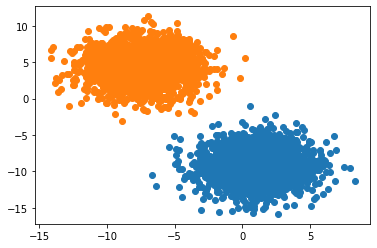

In [595]:
X, y = sklearn.datasets.make_blobs(n_samples=4000, centers = 2,cluster_std = 2.1)

classes = np.unique(y)
for i in range(len(classes)):
    class_mask = y == classes[i]
    plt.scatter(X[class_mask, 0], X[class_mask, 1])

In [596]:
dataset = easyDataset(X,y)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net = FeedForward(num_of_attributes=2, num_of_hidden_layers=0 ,num_of_hidden_units=0, num_of_classes=1).to(DEVICE)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

train(net, optimizer, criterion, loader, 10, DEVICE, verbose=True)

epoch 0, loss: 0.32329893118095776
epoch 1, loss: 0.026577290945819447
epoch 2, loss: 0.015555788045896897
epoch 3, loss: 0.011434918010814322
epoch 4, loss: 0.009234722511517622
epoch 5, loss: 0.007851208371686794
epoch 6, loss: 0.006893650011440355
epoch 7, loss: 0.006187521538416308
epoch 8, loss: 0.005642762673752648
epoch 9, loss: 0.005208059971679061


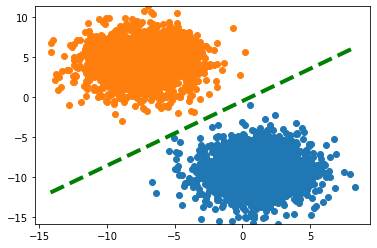

In [597]:
b = net.layers[0].bias.cpu().detach().item()
weights = net.layers[0].weight.cpu().detach().flatten().numpy()
w1, w2 = weights[0] , weights[1]

c = -b/w2
m = -w1/w2

x1min, x2min = X.min(axis=0).tolist()
x1max, x2max = X.max(axis=0).tolist()
xd = np.array([x1min, x1max])
yd = m*xd + c
plt.plot(xd, yd, 'g', lw=4, ls='--',)
plt.ylim(x2min,x2max)

classes = np.unique(y)
for i in range(len(classes)):
    class_mask = y == classes[i]
    plt.scatter(X[class_mask, 0], X[class_mask, 1])

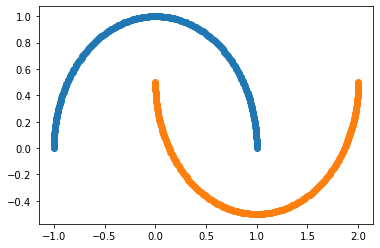

In [598]:
X, y = sklearn.datasets.make_moons(n_samples=500)

classes = np.unique(y)
for i in range(len(classes)):
    class_mask = y == classes[i]
    plt.scatter(X[class_mask, 0], X[class_mask, 1])

In [601]:
dataset = easyDataset(X,y)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net = FeedForward(num_of_attributes=2, num_of_hidden_layers=2 ,num_of_hidden_units=[32,2], num_of_classes=1).to(DEVICE)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr= 0.001)

train(net, optimizer, criterion, loader, 100, DEVICE, verbose=False)

epoch 99, loss: 0.1984227653592825


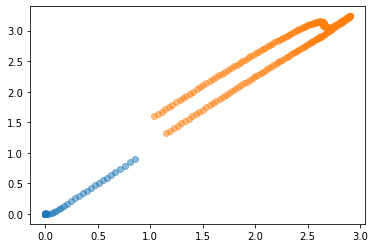

In [602]:
step_1 = net.layers[0]
step_2 = net.layers[1]


transformed_X = step_1(torch.tensor(X, dtype=torch.float32).to(DEVICE))#.cpu().detach().numpy()
transformed_X = step_2(transformed_X).cpu().detach().numpy()

#transformed_X.shape
for i in range(len(classes)):
    class_mask = y == classes[i]
    plt.scatter(transformed_X[class_mask, 0], transformed_X[class_mask, 1], alpha=0.5)

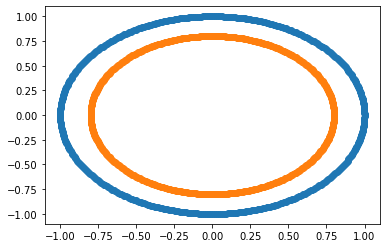

In [603]:
X, y = sklearn.datasets.make_circles(n_samples=1000)

classes = np.unique(y)
for i in range(len(classes)):
    class_mask = y == classes[i]
    plt.scatter(X[class_mask, 0], X[class_mask, 1])

In [604]:
dataset = easyDataset(X,y)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net = FeedForward(num_of_attributes=2, num_of_hidden_layers=2 ,num_of_hidden_units=[8,2], num_of_classes=1).to(DEVICE)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(net.parameters(), lr= LEARNING_RATE)

train(net, optimizer, criterion, loader, 100, DEVICE, verbose=False)

epoch 99, loss: 0.660005334764719


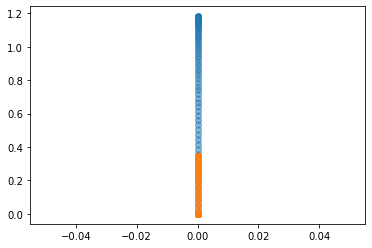

In [605]:
step_1 = net.layers[0]
step_2 = net.layers[1]


transformed_X = step_1(torch.tensor(X, dtype=torch.float32).to(DEVICE))#.cpu().detach().numpy()
transformed_X = step_2(transformed_X).cpu().detach().numpy()

#transformed_X.shape
for i in range(len(classes)):
    class_mask = y == classes[i]
    plt.scatter(transformed_X[class_mask, 0], transformed_X[class_mask, 1], alpha=0.3)

### Normalization and standarization + Preprocessing

In [606]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X,y = sklearn.datasets.make_friedman1(1000)

# mess up some attributes 
X[:, [1,5]] *= 1000
X[:, [0,2]] /= 500
X[:, [7,8]] += 999
X[:, [3,9]] *= -1000

df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000985,506.334551,9.808749e-04,-509.958119,0.502974,479.914970,0.496438,999.499317,999.492556,-496.655390
std,0.000571,293.527939,5.833690e-04,286.547101,0.288211,286.936097,0.281836,0.293048,0.276019,293.403075
min,0.000004,0.586132,2.053678e-08,-999.728076,0.000063,0.048079,0.003444,999.000214,999.000309,-999.694042
25%,0.000522,251.238820,4.883252e-04,-766.024443,0.262653,235.995332,0.249526,999.243092,999.262294,-748.154768
50%,0.000982,510.509145,9.741214e-04,-514.803882,0.507097,460.813671,0.499048,999.511144,999.483905,-507.323054
75%,0.001474,765.710756,1.501681e-03,-262.637638,0.759201,729.086558,0.729883,999.760643,999.720459,-243.306540
max,0.002000,999.976353,1.999543e-03,-0.110257,0.999579,996.917930,0.999418,999.999136,999.999357,-0.216593


In [607]:
dataset = easyDataset(X,y)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net = FeedForward(num_of_attributes=10, num_of_hidden_layers=2 ,num_of_hidden_units=[32,16], num_of_classes=1).to(DEVICE)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

train(net, optimizer, criterion, loader, 20, DEVICE, verbose=False)

epoch 19, loss: 12.490311741828918


In [610]:
scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)

df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.491494,0.506057,0.490544,0.489957,0.503155,0.481374,0.494987,0.499641,0.492716,0.503302
std,0.286246,0.293707,0.291754,0.286657,0.288351,0.287837,0.282976,0.293364,0.276282,0.293556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.259425,0.250806,0.244211,0.233793,0.262717,0.236688,0.247076,0.243140,0.262234,0.251671
50%,0.490126,0.510234,0.487167,0.485110,0.507279,0.462212,0.497608,0.511482,0.484056,0.492628
75%,0.736234,0.765591,0.751010,0.737372,0.759506,0.731328,0.729376,0.761250,0.720837,0.756783
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [609]:
dataset = easyDataset(X,y)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net = FeedForward(num_of_attributes=10, num_of_hidden_layers=2 ,num_of_hidden_units=[16,8], num_of_classes=1).to(DEVICE)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01) #Learning rate has big impact in that case!
#the lower rate the slower the training

train(net, optimizer, criterion, loader, 20, DEVICE, verbose=False)

epoch 19, loss: 6.900572776794434


In [611]:
X,y = sklearn.datasets.make_friedman1(1000)

# mess up some attributes 
X[:, [1,5]] *= 1000
X[:, [0,2]] /= 500
X[:, [7,8]] += 999
X[:, [3,9]] *= -1000

#And now additionally add some outliers
X[:10, 1] = np.random.randint(0, 10, 10)
X[:10, 5] = np.random.randint(1500, 2000, 10)
X[:10, 0] = np.random.randint(0, 2, 10)
#X[:10, 2] = np.random.randint(-3, 0, 10)


df = pd.DataFrame(X)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.005017,486.949212,0.000999,-505.614166,0.501997,521.570451,0.505062,999.509491,999.510358,-486.181424
std,0.063089,289.869328,0.000559,287.668595,0.288772,311.750991,0.284646,0.288954,0.284282,290.470973
min,0.000000,0.000000,0.000003,-997.084332,0.005210,0.307285,0.000413,999.000088,999.000736,-997.962251
25%,0.000563,237.315296,0.000523,-748.447775,0.243323,263.506859,0.272581,999.263027,999.277608,-739.346922
50%,0.001027,479.247387,0.001007,-501.488160,0.508213,529.754890,0.505579,999.515349,999.505564,-475.502918
75%,0.001508,732.603085,0.001466,-260.956319,0.747519,764.905041,0.750508,999.757983,999.756105,-239.913336
max,1.000000,999.994427,0.001998,-0.072957,0.999996,1933.000000,0.999087,999.997649,999.998440,-2.651607


In [612]:
scaler = MinMaxScaler().fit(X)
X_minmax = scaler.transform(X)

df = pd.DataFrame(X_minmax)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.005017,0.486952,0.499318,0.492943,0.499390,0.269708,0.505318,0.510649,0.510795,0.514192
std,0.063089,0.289871,0.280352,0.288531,0.290286,0.161304,0.285024,0.289660,0.284936,0.291840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000563,0.237317,0.260748,0.249382,0.239360,0.136183,0.272529,0.263582,0.277509,0.259834
50%,0.001027,0.479250,0.503111,0.497082,0.505639,0.273943,0.505836,0.516520,0.505990,0.524921
75%,0.001508,0.732607,0.733516,0.738335,0.746199,0.395613,0.751091,0.759748,0.757108,0.761620
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:xlabel='5', ylabel='0'>

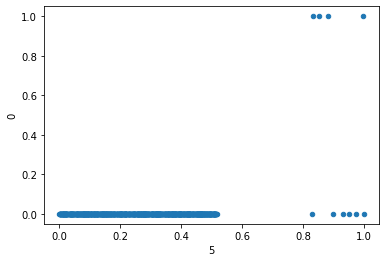

In [613]:
df.plot.scatter(5,0)


<AxesSubplot:>

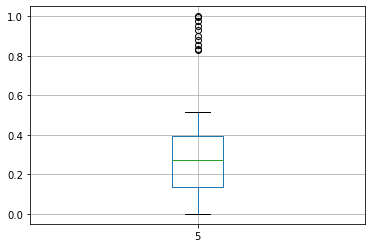

In [614]:
df.boxplot(5)

In [617]:
dataset = easyDataset(X_minmax,y)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net = FeedForward(num_of_attributes=10, num_of_hidden_layers=2 ,num_of_hidden_units=[16,8], num_of_classes=1).to(DEVICE)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01) #Learning rate has big impact in that case!
#the lower rate the slower the training

train(net, optimizer, criterion, loader, 30, DEVICE, verbose=False)

epoch 29, loss: 7.968854576349258


In [618]:
scaler = StandardScaler().fit(X)
X_std= scaler.transform(X)

df = pd.DataFrame(X_std)
df.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.953993e-17,4.560796e-16,6.449286e-16,1.730838e-15,1.155807e-15,9.614531e-16,1.254552e-15,7.478900e-13,6.257734e-13,1.053158e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-7.956316e-02,-1.680733e+00,-1.781931e+00,-1.709314e+00,-1.721202e+00,-1.672886e+00,-1.773786e+00,-1.763806e+00,-1.793565e+00,-1.762782e+00
25%,-7.063986e-02,-8.616256e-01,-8.513935e-01,-8.445660e-01,-8.962215e-01,-8.282018e-01,-8.171441e-01,-8.533819e-01,-8.191411e-01,-8.720051e-01
50%,-6.328067e-02,-2.658329e-02,1.353732e-02,1.435009e-02,2.153565e-02,2.626627e-02,1.817984e-03,2.028150e-02,-1.687061e-02,3.678112e-02
75%,-5.565091e-02,8.478882e-01,8.357907e-01,8.509106e-01,8.506535e-01,7.809321e-01,8.627187e-01,8.604036e-01,8.648832e-01,8.482476e-01
max,1.577909e+01,1.770805e+00,1.786799e+00,1.758253e+00,1.725404e+00,4.529691e+00,1.736448e+00,1.690245e+00,1.717755e+00,1.665474e+00


In [619]:
dataset = easyDataset(X_std,y)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net = FeedForward(num_of_attributes=10, num_of_hidden_layers=2 ,num_of_hidden_units=[16,8], num_of_classes=1).to(DEVICE)
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01) #Learning rate has big impact in that case!
#the lower rate the slower the training

train(net, optimizer, criterion, loader, 30, DEVICE, verbose=False)

epoch 29, loss: 7.037934333086014


### Visualizing MNIST weights

In [571]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [572]:
dataset = datasets.MNIST(
        root="mnist", # folder to which save dataset
        download=True, # get data locally
        train=True, # download
        transform = ToTensor() # This also performs normalization
        #on the image
    )

loader = DataLoader(dataset, batch_size=BATCH_SIZE)

net = FeedForward(num_of_attributes=28*28, num_of_hidden_layers=0 ,num_of_hidden_units=0, num_of_classes=10).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

train(net, optimizer, criterion, loader, 10, DEVICE, verbose=True, multiclass=True)

epoch 0, loss: 0.9795633413866639
epoch 1, loss: 0.5512792555126809
epoch 2, loss: 0.4717218152590906
epoch 3, loss: 0.43293775992193967
epoch 4, loss: 0.40887254812538243
epoch 5, loss: 0.39205464818425523
epoch 6, loss: 0.3794298056028545
epoch 7, loss: 0.3694880029984883
epoch 8, loss: 0.3613862507362991
epoch 9, loss: 0.3546120968939208


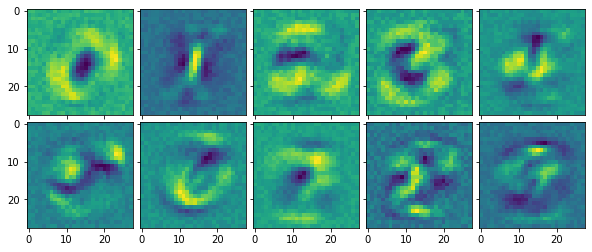

In [573]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))


grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 5),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, net.layers[0].weight):
    # Iterating over the grid returns the Axes.
    im = im.detach().cpu().numpy()
    im = np.reshape(im, (28,28))
    ax.imshow(im)



### L2 vs L1 regularization + Under/OverFitting + ValidationSets

In [620]:
# WE can write our own loss function
class RegularizationLoss(nn.Module):
    def __init__(self, base_loss, regularization_type = "L2", weight_decay=0.001, device="cpu"):
        super().__init__() # constructor of parent class
        self.base_loss = base_loss
        self.regularization_type = regularization_type
        self.weight_decay = weight_decay
        self.device = device

        if regularization_type == "L2":
            self.reg_loss = nn.MSELoss()
        else:
            self.reg_loss = nn.L1Loss()

    def forward(self, predictions, targets, weights):
        base_loss = self.base_loss(predictions, targets)

        regularization_loss = torch.tensor(0, dtype=torch.float32, requires_grad=True).to(self.device)
        for weight in weights:

            regularization_loss += self.weight_decay * self.reg_loss(weight, torch.zeros_like(weight))
            

        return base_loss, regularization_loss
        

In [621]:
def train_regularization(model, optimizer, loss_func, loader, epochs, device, verbose, multiclass=False, do_validate=False, validate_loader=None, classification=True):
    losses_averaged = []
    if do_validate:
        val_losses = []

    for epoch in range(epochs):
        losses = []
        reg_losses = []
        model.train()
        for X, y in loader:
            X, y = X.to(device), y.to(device)

            
            optimizer.zero_grad()
            logits = model(X)
            
            if not multiclass:
                logits = logits.flatten()
            
            base_loss, reg_loss = loss_func(logits, y, model.parameters())
            losses.append(base_loss.item())
            reg_losses.append(reg_loss.item())

            base_loss.backward(retain_graph=True)
            reg_loss.backward()
            optimizer.step()

        if verbose or epoch == epochs-1:
            print(f"epoch {epoch}, base_loss: {sum(losses)/ len(losses)}, reg_loss: {sum(reg_losses)/ len(reg_losses)}")
            
        losses_averaged.append(sum(losses)/ len(losses))
        if do_validate:
            if classification:
                val_losses.append(validate(validate_loader, model, nn.BCEWithLogitsLoss(), device))
            else:
                val_losses.append(validate(validate_loader, model, nn.MSELoss(), device))

    if do_validate:
        return losses_averaged, val_losses

    return losses_averaged

In [622]:
def validate(loader, model, loss_func, device, multiclass=False):

    model.eval()
    losses = []

    for X, y in loader:
        X, y = X.to(device), y.to(device)

        logits = model(X)
        
        if not multiclass:
            logits = logits.flatten()
        
        base_loss = loss_func(logits, y)
        losses.append(base_loss.item())

    
    print(f"validation loss: {sum(losses)/ len(losses)}")
    
    return sum(losses)/ len(losses)

In [623]:
def sum_weights(weights):
    sum_ = 0
    for weight in weights:
        sum_ += torch.sum(torch.abs(weight))

    return sum_.item()

In [624]:
def experiment_regularization(X, y, net, weight_decay=0.1, get_losses=False, do_validate=False, classification=True, val_data=None):
    dataset = easyDataset(X,y)
    loader = DataLoader(dataset, batch_size=BATCH_SIZE)
    
    if classification:
        base_loss = nn.BCEWithLogitsLoss()
    else:
        base_loss = nn.MSELoss()
    
    criterion = RegularizationLoss(base_loss, regularization_type = "L1", weight_decay = weight_decay, device=DEVICE)

    optimizer = optim.Adam(net.parameters(), lr=0.01)

    val_loader = None
    if do_validate:
        dataset = easyDataset(val_data[0], val_data[1])
        val_loader = DataLoader(dataset, batch_size=BATCH_SIZE)

    losses = train_regularization(net, optimizer, criterion, loader, 20, DEVICE, verbose=True, do_validate=do_validate, validate_loader=val_loader, classification=classification)
    print(f"sum_weights: {sum_weights(net.parameters())}")

    if get_losses:
        return losses


In [625]:
X, y = sklearn.datasets.make_classification(n_samples=10000, n_informative=10, n_redundant=10)

net = FeedForward(num_of_attributes=20, num_of_hidden_layers=2 ,num_of_hidden_units=[32,16], num_of_classes=1).to(DEVICE)

experiment_regularization(X, y, net, weight_decay=0)

epoch 0, base_loss: 0.19300933936788778, reg_loss: 0.0
epoch 1, base_loss: 0.11529330522486358, reg_loss: 0.0
epoch 2, base_loss: 0.10145538227905514, reg_loss: 0.0
epoch 3, base_loss: 0.08971758686884004, reg_loss: 0.0
epoch 4, base_loss: 0.08284074278358536, reg_loss: 0.0
epoch 5, base_loss: 0.07968728042023766, reg_loss: 0.0
epoch 6, base_loss: 0.07543028583216249, reg_loss: 0.0
epoch 7, base_loss: 0.07399241702933647, reg_loss: 0.0
epoch 8, base_loss: 0.07057104445697301, reg_loss: 0.0
epoch 9, base_loss: 0.0683916455407621, reg_loss: 0.0
epoch 10, base_loss: 0.06838470420972177, reg_loss: 0.0
epoch 11, base_loss: 0.06604272188102696, reg_loss: 0.0
epoch 12, base_loss: 0.06541803382280739, reg_loss: 0.0
epoch 13, base_loss: 0.06388437568883347, reg_loss: 0.0
epoch 14, base_loss: 0.06628841996359028, reg_loss: 0.0
epoch 15, base_loss: 0.06204301029500095, reg_loss: 0.0
epoch 16, base_loss: 0.06223647774398849, reg_loss: 0.0
epoch 17, base_loss: 0.06183368295941288, reg_loss: 0.0
epo

In [626]:
X, y = sklearn.datasets.make_classification(n_samples=10000, n_informative=10, n_redundant=10)


net = FeedForward(num_of_attributes=20, num_of_hidden_layers=2 ,num_of_hidden_units=[32,16], num_of_classes=1).to(DEVICE)

experiment_regularization(X, y, net, weight_decay=2)


epoch 0, base_loss: 0.30442683474653087, reg_loss: 0.30798484641275586
epoch 1, base_loss: 0.18412970319675032, reg_loss: 0.207972807489383
epoch 2, base_loss: 0.17175012753362867, reg_loss: 0.19225565472226233
epoch 3, base_loss: 0.16768114880961218, reg_loss: 0.18731048494387584
epoch 4, base_loss: 0.16606684199943664, reg_loss: 0.18655881646332467
epoch 5, base_loss: 0.16531694818074535, reg_loss: 0.18600152356989064
epoch 6, base_loss: 0.16457167125431596, reg_loss: 0.18552271499755277
epoch 7, base_loss: 0.16399884736462003, reg_loss: 0.1845767930814415
epoch 8, base_loss: 0.16392959455016312, reg_loss: 0.18445251341078692
epoch 9, base_loss: 0.16364770484672989, reg_loss: 0.18515117722711746
epoch 10, base_loss: 0.16320307721283026, reg_loss: 0.18532397953947638
epoch 11, base_loss: 0.1625759915513977, reg_loss: 0.18565606710257804
epoch 12, base_loss: 0.1620859038440665, reg_loss: 0.185198722276718
epoch 13, base_loss: 0.16203299921694075, reg_loss: 0.18543833968745674
epoch 14,

In [582]:
# So which model to choose?
N_SAMPLES = 5000
train_size = 0.6
val_size = 0.2
test_size = 0.2
X, y = sklearn.datasets.make_regression(n_samples=N_SAMPLES, noise=2, n_features=20, n_informative=10)

#dividing data into 3 sets like that is quite oldschool, K-fold validation is preffered. But if you have really big dataset. Than K-fold may be too computationally expensive.

X_train, y_train = X[:int(train_size*N_SAMPLES)], y[:int(train_size*N_SAMPLES)] # we train on this dataset
X_val, y_val = X[int(train_size*N_SAMPLES):int((train_size+ val_size)*N_SAMPLES)], y[int(train_size*N_SAMPLES):int((train_size+ val_size)*N_SAMPLES)] #we seek for good
#hyperparameters, best model using this dataset, we don't do it to avoif overfitting test_set
X_test, y_test = X[int((train_size+ val_size)*N_SAMPLES):], y[int((train_size+ val_size)*N_SAMPLES):] #we do final check here. We shouldn't modify our model based on scores on that set

In [638]:
net = FeedForward(num_of_attributes=20, num_of_hidden_layers=2 ,num_of_hidden_units=[32, 16], num_of_classes=1).to(DEVICE)

#losses = experiment_regularization(X_train, y_train, net, weight_decay=1, get_losses=True, do_validate=True, classification=False, val_data=(X_val, y_val))

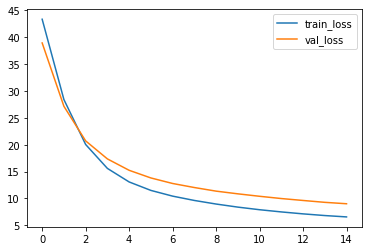

In [634]:
plt.plot(losses[0][5:], label="train_loss")
plt.plot(losses[1][5:], label="val_loss")
plt.legend()

In [639]:
dataset = easyDataset(X_test,y_test)
loader = DataLoader(dataset, batch_size=BATCH_SIZE)

loss = validate(loader, net, nn.MSELoss(), DEVICE)

validation loss: 24475.274047851562


In [640]:
from sklearn.model_selection import KFold

N_SPLITS = 4
kf = KFold(n_splits=4)

loss_train = [] 
loss_val = []
for train_index, test_index in kf.split(X):
    X_train, X_val = X[train_index], X[test_index]
    y_train, y_val = y[train_index], y[test_index]

    losses = experiment_regularization(X_train, y_train, net, weight_decay=0, get_losses=True, do_validate=True, classification=False, val_data=(X_val, y_val))

    loss_train.append(losses[0][-1])
    loss_val.append(losses[1][-1])
print(loss_train, loss_val)


epoch 0, base_loss: 0.07125757770391844, reg_loss: 0.0
validation loss: 0.04980113194324076
epoch 1, base_loss: 0.04192330231258677, reg_loss: 0.0
validation loss: 0.04035358144901693
epoch 2, base_loss: 0.03455151867326665, reg_loss: 0.0
validation loss: 0.035486105876043436
epoch 3, base_loss: 0.03094786592419812, reg_loss: 0.0
validation loss: 0.035304970969446
epoch 4, base_loss: 0.028229456631687737, reg_loss: 0.0
validation loss: 0.033091786131262776
epoch 5, base_loss: 0.026550381795613694, reg_loss: 0.0
validation loss: 0.03207498823758215
epoch 6, base_loss: 0.025402183005175855, reg_loss: 0.0
validation loss: 0.030140863126143815
epoch 7, base_loss: 0.024068270304824335, reg_loss: 0.0
validation loss: 0.03258756436407566
epoch 8, base_loss: 0.022882352906705466, reg_loss: 0.0
validation loss: 0.0313955303048715
epoch 9, base_loss: 0.02303803358542717, reg_loss: 0.0
validation loss: 0.03256821418181062
epoch 10, base_loss: 0.02297197494229649, reg_loss: 0.0
validation loss: 0.